In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict, defaultdict
from pyemd import emd

from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [5]:
fic = Dataset('../../data/hathi-fic-3bins.json/')
non = Dataset('../../data/hathi-non-3bins.json/')

In [6]:
fic_novels = list(fic.novels())
non_novels = list(non.novels())

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

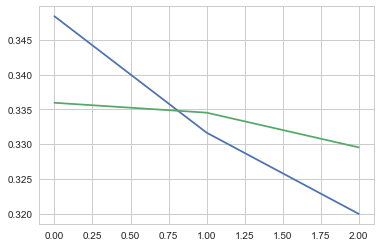

In [25]:
fic_a = [np.array(novel['counts']['a']) for novel in fic_novels]
fic_a = np.stack([s for s in fic_a if s.sum() > 100]).sum(0)

non_a = [np.array(novel['counts']['a']) for novel in non_novels]
non_a = np.stack([s for s in non_a if s.sum() > 100]).sum(0)

plt.plot(fic_a / fic_a.sum())
plt.plot(non_a / non_a.sum())

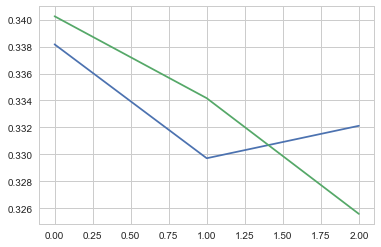

In [28]:
fic_a = [np.array(novel['counts']['the']) for novel in fic_novels]
fic_a = np.stack([s for s in fic_a if s.sum() > 100]).sum(0)

non_a = [np.array(novel['counts']['the']) for novel in non_novels]
non_a = np.stack([s for s in non_a if s.sum() > 100]).sum(0)

plt.plot(fic_a / fic_a.sum())
plt.plot(non_a / non_a.sum())